In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

baseball_data = pd.read_csv("baseball.csv")
del baseball_data["Team"]
del baseball_data["Lg"]
baseball_data.head()

,Rk,Season,W,OPS+▼,GP,W.1,L,WL%,Bat#,PA,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,LOB,R/Gm
0,1,2022,78,118,133,78,55,0.586,23,5097,...,0.762,118,1954,91,68,4,41,9,940,5.0
1,2,2022,91,115,132,91,41,0.689,29,5101,...,0.786,115,2026,75,46,1,45,16,942,5.4
2,3,2022,72,113,131,72,59,0.550,20,4964,...,0.749,113,1903,104,46,8,27,11,896,4.6
3,4,2022,79,111,133,79,54,0.594,22,5064,...,0.744,111,1879,95,59,12,33,27,894,4.9
4,5,2022,67,110,131,67,64,0.511,27,4931,...,0.727,110,1800,100,45,10,36,8,899,4.4


In [2]:
baseball_data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Rk,Season,W,OPS+▼,GP,W.1,L,WL%,Bat#,PA,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,LOB,R/Gm
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,2022.0,66.266667,100.066667,132.533333,66.266667,66.266667,0.499900,27.733333,4971.433333,...,0.706967,100.066667,1763.400000,91.866667,55.433333,10.333333,33.700000,12.466667,891.800000,4.310000
std,8.803408,0.0,12.173837,10.184279,1.105888,12.173837,12.117054,0.091293,5.037332,93.600650,...,0.038712,10.184279,138.228846,13.174514,12.667317,6.104455,6.374248,5.829375,43.282074,0.481628
min,1.000000,2022.0,46.000000,81.000000,130.000000,46.000000,41.000000,0.346000,20.000000,4786.000000,...,0.621000,81.000000,1475.000000,66.000000,36.000000,0.000000,21.000000,4.000000,805.000000,3.300000
10%,3.900000,2022.0,50.800000,83.900000,131.000000,50.800000,50.800000,0.381800,22.000000,4840.500000,...,0.653200,83.900000,1585.100000,75.000000,43.800000,3.900000,26.900000,6.000000,833.600000,3.590000
25%,8.250000,2022.0,56.000000,95.250000,132.000000,56.000000,58.250000,0.421000,23.000000,4925.250000,...,0.690000,95.250000,1684.250000,80.750000,46.000000,6.250000,28.000000,8.250000,861.000000,4.125000
50%,15.500000,2022.0,67.000000,101.000000,133.000000,67.000000,65.000000,0.507500,27.000000,4971.000000,...,0.704500,101.000000,1748.000000,92.500000,52.500000,10.000000,34.500000,11.000000,897.500000,4.400000
75%,22.750000,2022.0,74.000000,108.500000,133.000000,74.000000,77.000000,0.561000,32.000000,5036.500000,...,0.734000,108.500000,1856.500000,99.750000,64.000000,14.000000,37.750000,15.750000,921.250000,4.575000
90%,27.100000,2022.0,83.200000,111.200000,134.000000,83.200000,82.100000,0.620500,35.000000,5097.400000,...,0.750300,111.200000,1911.700000,107.500000,71.500000,18.100000,43.000000,20.100000,942.000000,4.900000
max,30.000000,2022.0,91.000000,118.000000,134.000000,91.000000,87.000000,0.689000,36.000000,5125.000000,...,0.786000,118.000000,2033.000000,119.000000,88.000000,27.000000,45.000000,27.000000,978.000000,5.400000


In [3]:
baseball_data.columns

Index(['Rk', 'Season', 'W', 'OPS+▼', 'GP', 'W.1', 'L', 'WL%', 'Bat#', 'PA',
       'AB', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GIDP', 'HBP', 'SH', 'SF',
       'IBB', 'LOB', 'R/Gm'],
      dtype='object')

<AxesSubplot: ylabel='Density'>

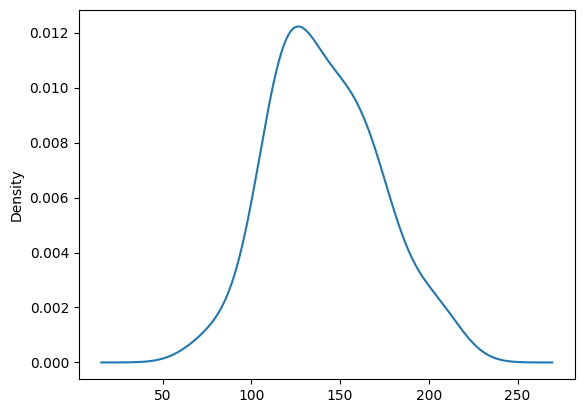

In [4]:
baseball_data["HR"].plot.density()

In [5]:
baseball_data.corr()

,Rk,Season,W,OPS+▼,GP,W.1,L,WL%,Bat#,PA,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,LOB,R/Gm
Rk,1.000000,NaN,-0.845247,-0.980372,-0.024794,-0.845247,0.846945,-0.847494,0.367800,-0.687119,...,-0.882170,-0.980372,-0.837356,0.013974,-0.081479,0.400395,-0.295882,-0.370238,-0.522631,-0.846217
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W,-0.845247,NaN,1.000000,0.829228,0.096647,1.000000,-0.995866,0.998966,-0.173116,0.666473,...,0.790769,0.829228,0.755255,-0.247022,0.207852,-0.358061,0.405444,0.468057,0.505198,0.817599
OPS+▼,-0.980372,NaN,0.829228,1.000000,0.051845,0.829228,-0.828383,0.830486,-0.350508,0.755782,...,0.905524,1.000000,0.858423,-0.014838,0.102409,-0.333164,0.373208,0.386872,0.613184,0.874401
GP,-0.024794,NaN,0.096647,0.051845,1.000000,0.096647,-0.005833,0.052121,-0.029299,0.462738,...,0.019761,0.051845,0.158489,0.064218,-0.044144,0.177074,0.062614,0.190066,0.273181,-0.023307
W.1,-0.845247,NaN,1.000000,0.829228,0.096647,1.000000,-0.995866,0.998966,-0.173116,0.666473,...,0.790769,0.829228,0.755255,-0.247022,0.207852,-0.358061,0.405444,0.468057,0.505198,0.817599
L,0.846945,NaN,-0.995866,-0.828383,-0.005833,-0.995866,1.000000,-0.998891,0.171253,-0.627364,...,-0.792671,-0.828383,-0.744329,0.254040,-0.212855,0.375900,-0.401629,-0.452904,-0.482633,-0.823557
WL%,-0.847494,NaN,0.998966,0.830486,0.052121,0.998966,-0.998891,1.000000,-0.174171,0.648180,...,0.792205,0.830486,0.750518,-0.250159,0.207454,-0.366860,0.404610,0.460721,0.495924,0.820818
Bat#,0.367800,NaN,-0.173116,-0.350508,-0.029299,-0.173116,0.171253,-0.174171,1.000000,-0.203207,...,-0.291820,-0.350508,-0.330404,-0.243726,0.299635,0.370804,-0.001503,-0.097780,-0.145601,-0.214903
PA,-0.687119,NaN,0.666473,0.755782,0.462738,0.666473,-0.627364,0.648180,-0.203207,1.000000,...,0.781461,0.755782,0.794137,0.104296,0.239654,-0.184630,0.494608,0.513540,0.851156,0.777128


<AxesSubplot: >

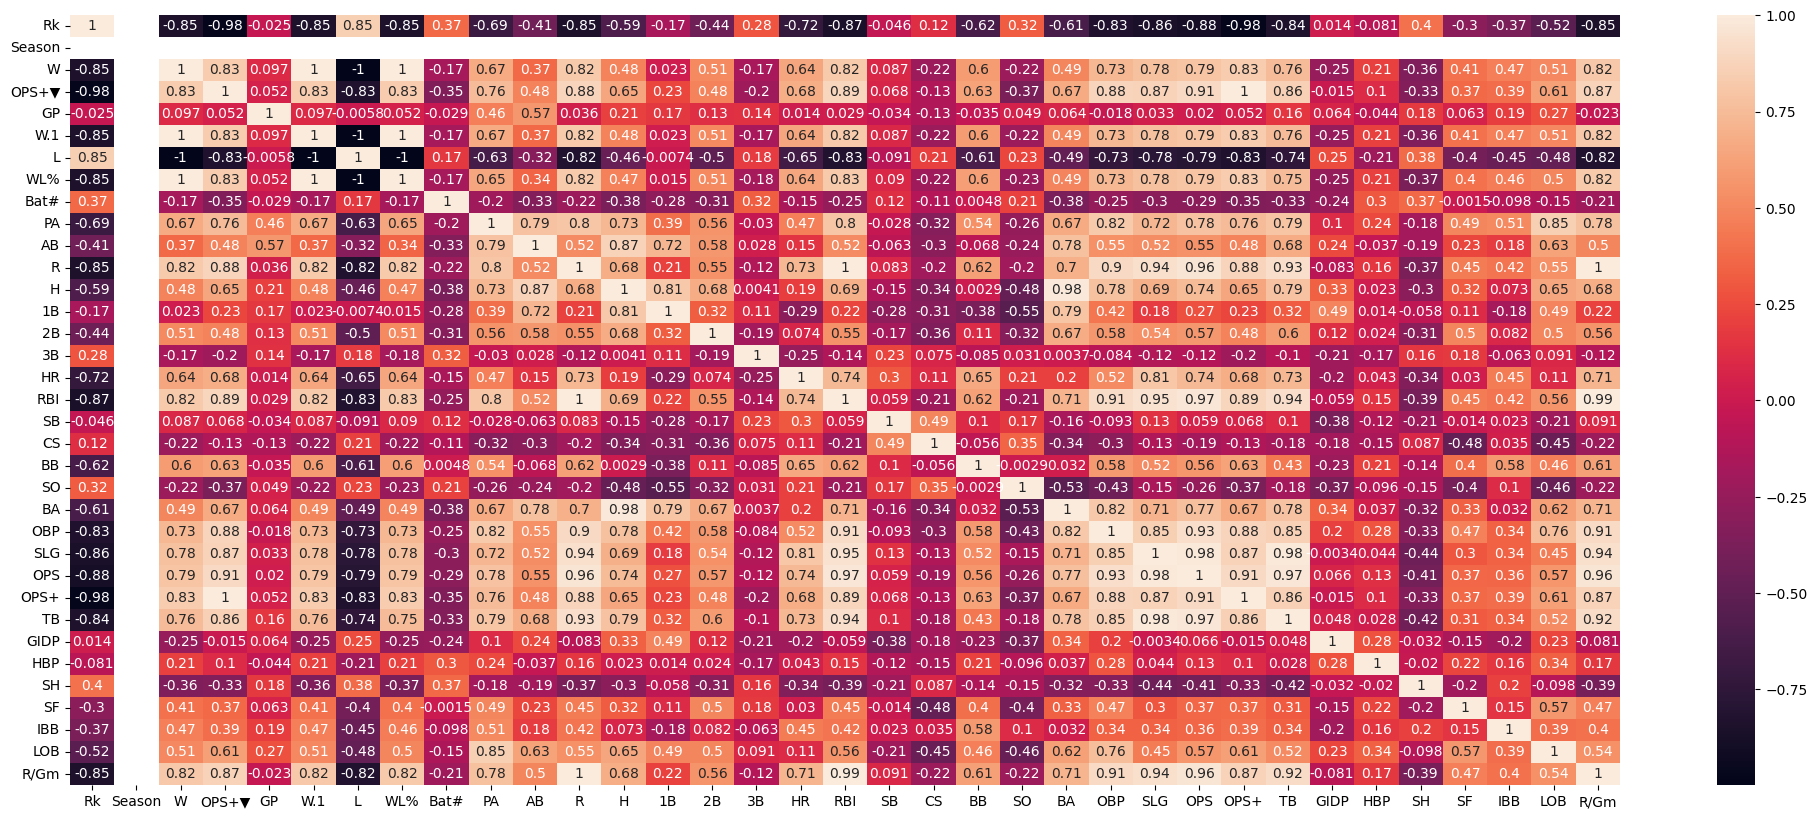

In [68]:
plt.figure(figsize = (25, 10))
sns.heatmap(baseball_data.corr(),annot = True)

<AxesSubplot: xlabel='W', ylabel='HR'>

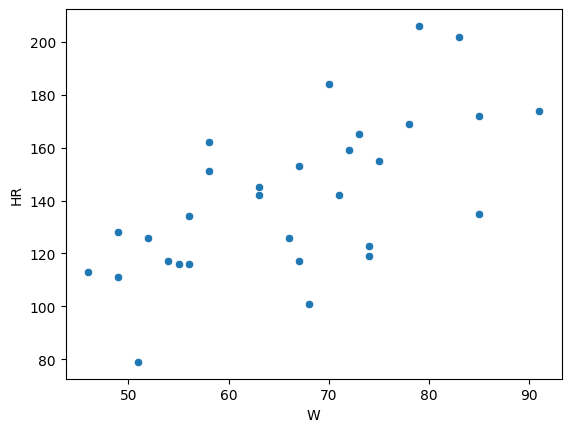

In [21]:
sns.scatterplot(data = baseball_data, x = baseball_data["W"], y = baseball_data["HR"])

In [80]:
X = baseball_data[["AB", "W"]]
y = baseball_data["HR"]
y

0     169
1     174
2     159
3     206
4     153
5     202
6     172
7     135
8     165
9     155
10    184
11    119
12    123
13    162
14    126
15    117
16    113
17    145
18    101
19    142
20    134
21    142
22    117
23    116
24    151
25    126
26    116
27    111
28    128
29     79
Name: HR, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4)

In [82]:
lm = LinearRegression()

In [83]:
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
Coef = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
Coef

,Coefficients
AB,-0.061293
W,2.007470


In [85]:
predictions = lm.predict(X_test)
print ("Size of the predicted object:", predictions.shape)

Size of the predicted object: (8,)


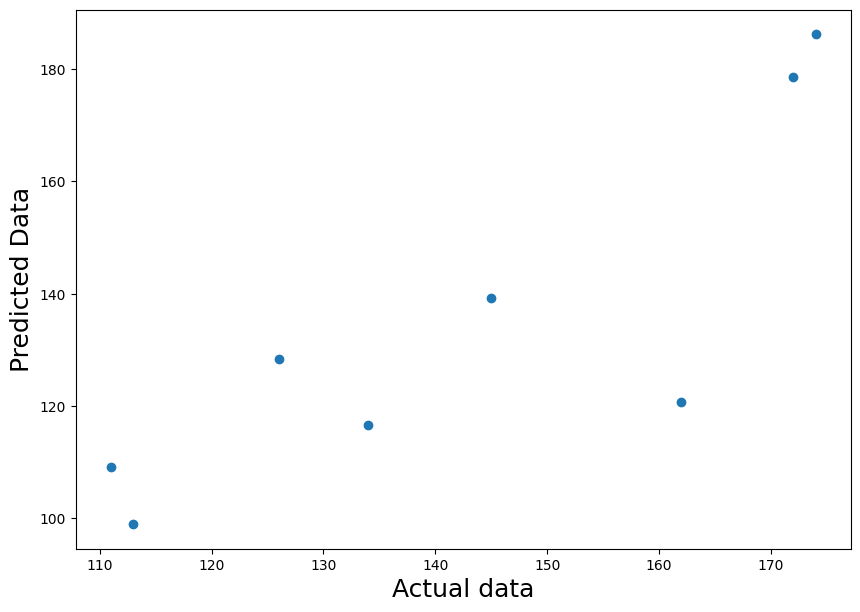

In [86]:
plt.figure(figsize=(10,7))
plt.xlabel("Actual data",fontsize=18)
plt.ylabel("Predicted Data", fontsize=18)
plt.scatter(x=y_test,y=predictions)

C:\Users\Home\AppData\Local\Temp\ipykernel_16408\928403460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<AxesSubplot: ylabel='Density'>

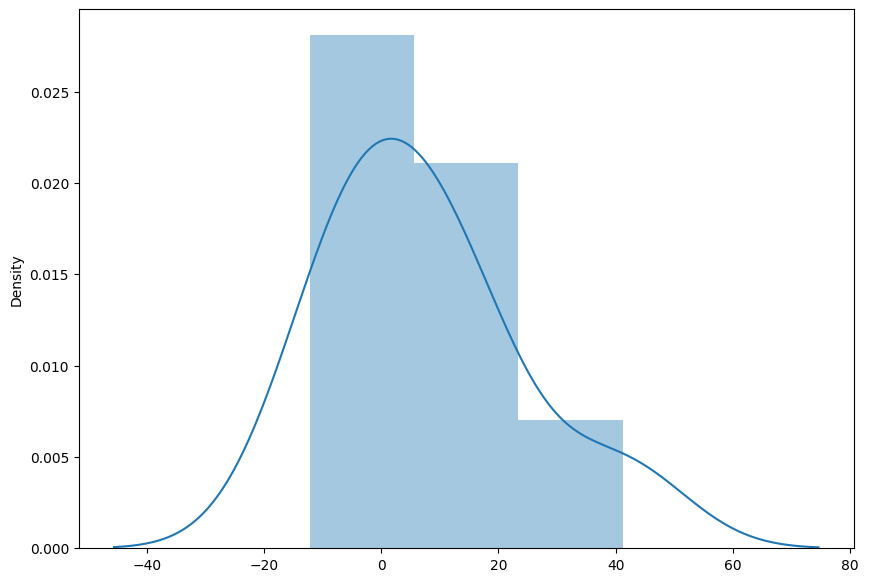

In [87]:
plt.figure(figsize=(10,7))
sns.distplot([y_test-predictions])

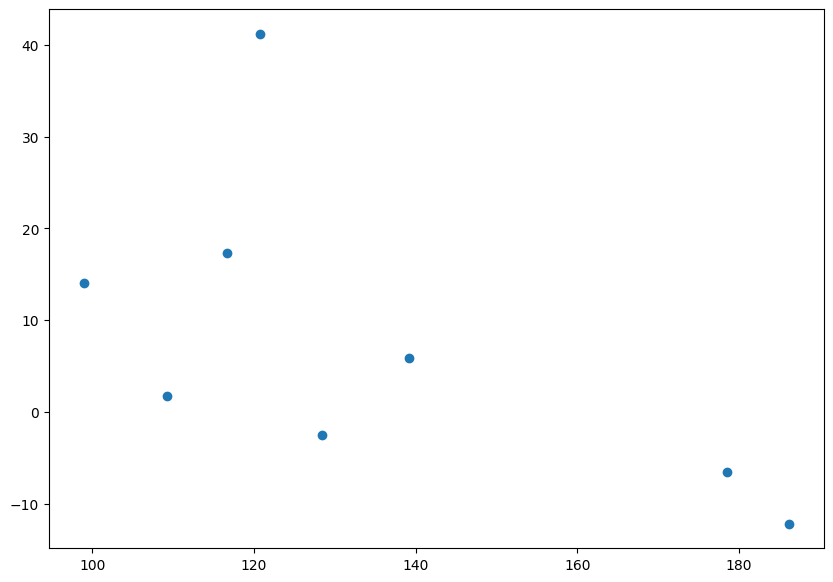

In [88]:
plt.figure(figsize=(10,7))
plt.scatter(x=predictions,y=y_test-predictions)

In [89]:
print("Mean absolute error:", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error:", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))


Mean absolute error: 12.663211219231368
Mean square error: 303.58924161895374
Root mean square error: 17.4238124880565


In [90]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.455
